# Test netrex + with yeast data

Use yeast dataset from Merlin p (https://github.com/Roy-lab/merlin-p_inferred_networks/tree/master/yeast_networks/) Initially going to test using the ChIP_prior and the NatVar and Stress expression datasets (lol we're just realizing that these are z-scores and whether we can use them is questionable)

If we can use:
1. prep input

In [44]:
import pandas as pd

In [45]:
#read and combine expression datasets

natvar = pd.read_table('../../s2cell-prior/data/yeast_networks/expression/NatVar.txt', index_col=0)
natvar.head()

,106E_22_2_d_YLK531_1%_eth,76g_14_7_c_YLK402_2%_glucose,87E_18_1_d_YLK447_1%_ethanol,BY6,53g_9_5_d_YLK311_2%_glu,BY5,BY3,18_1_d,7g_2_2_d_YLK127_2%_glu,42g_8_1_a_YLK264_2%_glucose,...,18_2_d,38E_7_5_d_YLK251_1%_ethanol,7_6_c,57E_10_2_d_YLK327_1%_ethanol,8_5_b,93E_19_2_c_YLK470_1%_ethanol,BY5E_BY4716_0_1%_eth,7_8_d,28E_6_2_b_YLK209_1%_eth,YLK810_glucose_vs_mixed_reference
Gene,,,,,,,,,,,,,,,,,,,,,
YAL008W,0.726117,0.340309,0.856106,-0.509045,0.117975,0.071603,-0.509045,0.898491,-0.706134,-0.320578,...,0.487095,1.150880,0.372037,1.366790,-0.417319,0.837928,1.112430,0.545853,1.075720,-0.352254
YBR255W,0.376677,-0.188054,0.281668,-0.081696,-0.054527,-0.401335,-0.081696,-0.569005,-0.185668,-0.500031,...,-0.096373,0.575759,0.191994,0.712333,0.383349,0.297706,0.506142,0.366568,-0.040117,-0.497460
YGR131W,-0.079048,0.529384,0.590860,0.031994,0.634168,0.031534,0.031994,0.462211,0.617947,0.536678,...,-0.113977,0.287145,0.080147,0.194628,-0.147097,0.965310,0.379911,0.422728,0.968333,-0.776701
YPL144W,-0.883448,0.094437,0.311489,-0.125391,0.889969,0.013942,-0.125391,0.261822,0.307802,1.084180,...,-1.153306,-0.818272,0.315563,-0.437038,0.098320,-0.184197,-0.246461,-0.846528,-0.018303,0.814974
YBR135W,-0.264855,0.233441,-0.142097,-0.303785,0.495773,-0.262404,-0.303785,-0.395335,0.584673,1.037320,...,-0.463668,-0.292183,-0.700540,0.117297,0.242175,-0.264770,0.118843,-0.349958,0.089925,0.898188


In [46]:
stress = pd.read_table('../../s2cell-prior/data/yeast_networks/expression/Stress.txt', index_col=0)
stress.head()

,Heat_Shock_05_minutes_hs-1,Heat_Shock_10_minutes_hs-1,Heat_Shock_15_minutes_hs-1,Heat_Shock_20_minutes_hs-1,Heat_Shock_30_minutes_hs-1,Heat_Shock_40_minutes_hs-1,Heat_Shock_60_minutes_hs-1,Heat_Shock_80_minutes_hs-1,Heat_Shock_000_minutes_hs-2,Heat_Shock_000_minutes__hs-2a,...,29_deg_growth_ct-1,37_deg_growth_ct-1,steady_state_15_dec_C_ct-2,steady_state_17_dec_C_ct-2,steady_state_21_dec_C_ct-2,steady_state_25_dec_C_ct-2,steady_state_29_dec_C_ct-2,steady_state_33_dec_C_ct-2,steady_state_36_dec_C_ct-2,steady_state_36_dec_C_ct-2_(repeat_hyb)
Name,,,,,,,,,,,,,,,,,,,,,
YAL001C,2.027010,0.195000,0.506000,0.501468,0.433508,2.027010,1.475770,2.027010,-0.903689,-0.379622,...,-0.660846,-2.039850,-1.019870,-0.315936,-1.274380,0.862317,0.471186,-0.306225,-0.673235,-0.598007
YAL002W,0.121435,-0.002004,0.253727,0.113475,-0.038841,0.121435,-0.002620,0.121435,-1.791890,-0.165805,...,-1.436190,-0.732129,-0.308816,-0.451953,-0.678249,-0.148299,-0.147555,-0.349301,0.401801,-1.686510
YAL003W,0.319417,0.186792,-0.092248,-0.122363,-0.842664,0.319417,-0.198551,0.319417,1.047180,1.250730,...,2.065360,-1.354850,1.160680,1.180240,1.184680,1.979310,2.130540,0.641447,-0.744904,-1.848630
YAL004W,0.430782,0.868098,0.232104,0.364530,0.176617,0.430782,0.086440,0.430782,0.682386,-0.312804,...,-3.161950,-0.503797,-0.664341,0.014389,0.389828,0.543175,-0.906918,-0.952364,-2.512740,-1.570710
YAL005C,3.660360,2.985890,0.349589,0.349589,0.349589,3.660360,0.349589,3.660360,-1.538120,-0.606802,...,0.339597,-0.898188,1.776930,-0.141058,0.514023,0.835722,1.343050,1.481430,0.664588,1.069490


In [47]:
print(natvar.shape, stress.shape)

(5660, 377) (6137, 173)


In [48]:
common_genes = natvar.index.intersection(stress.index)

len(natvar.index.intersection(stress.index))

5605

In [53]:
#I guess I can just use the intersection of genes

combined = natvar.loc[common_genes].join(stress.loc[common_genes])

In [54]:
combined.shape

(5605, 550)

In [55]:
combined.head()

,106E_22_2_d_YLK531_1%_eth,76g_14_7_c_YLK402_2%_glucose,87E_18_1_d_YLK447_1%_ethanol,BY6,53g_9_5_d_YLK311_2%_glu,BY5,BY3,18_1_d,7g_2_2_d_YLK127_2%_glu,42g_8_1_a_YLK264_2%_glucose,...,29_deg_growth_ct-1,37_deg_growth_ct-1,steady_state_15_dec_C_ct-2,steady_state_17_dec_C_ct-2,steady_state_21_dec_C_ct-2,steady_state_25_dec_C_ct-2,steady_state_29_dec_C_ct-2,steady_state_33_dec_C_ct-2,steady_state_36_dec_C_ct-2,steady_state_36_dec_C_ct-2_(repeat_hyb)
YAL008W,0.726117,0.340309,0.856106,-0.509045,0.117975,0.071603,-0.509045,0.898491,-0.706134,-0.320578,...,0.539685,0.118925,0.354829,0.325284,-0.181469,0.250628,0.977428,0.684522,0.569029,0.722092
YBR255W,0.376677,-0.188054,0.281668,-0.081696,-0.054527,-0.401335,-0.081696,-0.569005,-0.185668,-0.500031,...,0.164519,-0.483040,0.402232,-0.646262,0.787252,1.021890,0.668058,0.684522,-0.243220,-0.505368
YGR131W,-0.079048,0.529384,0.590860,0.031994,0.634168,0.031534,0.031994,0.462211,0.617947,0.536678,...,-0.810913,0.554831,0.402232,0.636178,-1.547610,-0.520631,-1.300660,-0.521604,0.115125,0.282059
YPL144W,-0.883448,0.094437,0.311489,-0.125391,0.889969,0.013942,-0.125391,0.261822,0.307802,1.084180,...,0.064475,-0.379253,0.402232,1.005370,0.787252,-1.185510,-4.169370,-0.672370,-0.577676,0.096782
YBR135W,-0.264855,0.233441,-0.142097,-0.303785,0.495773,-0.262404,-0.303785,-0.395335,0.584673,1.037320,...,0.089486,0.284985,-0.048098,-0.024473,0.240794,-0.307870,-0.316302,-0.478528,0.067346,0.513656


In [56]:
#read chip prior

chip = pd.read_table('../../s2cell-prior/data/yeast_networks/priors/ChIP_prior.txt', header=None,
                    names=['TF','gene', 'weight'])
chip.head()

,TF,gene,weight
0,YPR023C,YDL052C,0.159919
1,YGL151W,YHL015W,0.533227
2,YER159C,YER158C,0.180041
3,YNL330C,YJL097W,0.173219
4,YER159C,YDL116W,0.679581


In [57]:
chip_matrix = chip.set_index(['gene','TF']).unstack().fillna(value=0)

In [58]:
chip_matrix.shape

(6104, 323)

In [59]:
#once i have expression i can get intersection and reindex
good_idx = combined.index.intersection(chip_matrix.index)
idx_exp = combined.loc[good_idx]
idx_prior = chip_matrix.loc[good_idx]

In [60]:
print(idx_exp.shape, idx_prior.shape)

(5508, 550) (5508, 323)


In [61]:
#remove names
idx_prior.columns = idx_prior.columns.get_level_values(1)
idx_prior.index.name = None
idx_prior.columns.name = None
idx_prior.head()

,MATA1,TBP,YAL011W,YAL021C,YAL043C,YAL051W,YBL002W,YBL005W,YBL008W,YBL021C,...,YPR052C,YPR054W,YPR065W,YPR068C,YPR072W,YPR086W,YPR104C,YPR133C,YPR196W,YPR199C
YAL008W,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.461240,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.663062,0.0,0.194613,0.0,0.0,0.0,0.0
YBR255W,0.0,0.000000,0.90806,0.0,0.016632,0.0,0.096397,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.474741,0.0,0.344844,0.0,0.0,0.0,0.0
YGR131W,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.068175,0.0,0.0,0.0,0.0
YPL144W,0.0,0.113636,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.94283,0.0,0.0,0.000000,0.0,0.714667,0.0,0.0,0.0,0.0
YBR135W,0.0,0.143836,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.11059,0.0,0.0,0.000000,0.0,0.557300,0.0,0.0,0.0,0.0


In [146]:
idx_exp.head()

,106E_22_2_d_YLK531_1%_eth,76g_14_7_c_YLK402_2%_glucose,87E_18_1_d_YLK447_1%_ethanol,BY6,53g_9_5_d_YLK311_2%_glu,BY5,BY3,18_1_d,7g_2_2_d_YLK127_2%_glu,42g_8_1_a_YLK264_2%_glucose,...,29_deg_growth_ct-1,37_deg_growth_ct-1,steady_state_15_dec_C_ct-2,steady_state_17_dec_C_ct-2,steady_state_21_dec_C_ct-2,steady_state_25_dec_C_ct-2,steady_state_29_dec_C_ct-2,steady_state_33_dec_C_ct-2,steady_state_36_dec_C_ct-2,steady_state_36_dec_C_ct-2_(repeat_hyb)
YAL008W,0.726117,0.340309,0.856106,-0.509045,0.117975,0.071603,-0.509045,0.898491,-0.706134,-0.320578,...,0.539685,0.118925,0.354829,0.325284,-0.181469,0.250628,0.977428,0.684522,0.569029,0.722092
YBR255W,0.376677,-0.188054,0.281668,-0.081696,-0.054527,-0.401335,-0.081696,-0.569005,-0.185668,-0.500031,...,0.164519,-0.483040,0.402232,-0.646262,0.787252,1.021890,0.668058,0.684522,-0.243220,-0.505368
YGR131W,-0.079048,0.529384,0.590860,0.031994,0.634168,0.031534,0.031994,0.462211,0.617947,0.536678,...,-0.810913,0.554831,0.402232,0.636178,-1.547610,-0.520631,-1.300660,-0.521604,0.115125,0.282059
YPL144W,-0.883448,0.094437,0.311489,-0.125391,0.889969,0.013942,-0.125391,0.261822,0.307802,1.084180,...,0.064475,-0.379253,0.402232,1.005370,0.787252,-1.185510,-4.169370,-0.672370,-0.577676,0.096782
YBR135W,-0.264855,0.233441,-0.142097,-0.303785,0.495773,-0.262404,-0.303785,-0.395335,0.584673,1.037320,...,0.089486,0.284985,-0.048098,-0.024473,0.240794,-0.307870,-0.316302,-0.478528,0.067346,0.513656


In [62]:
#remove all 0 columns
trim_zeros_prior = idx_prior.loc[:, (idx_prior != 0).any(axis=0)]

In [147]:
trim_zeros_prior.to_csv('../../Programs/programs/yeast_chip_prior_for_netrex', sep='\t')
idx_exp.to_csv('../../Programs/programs/yeast_exp_for_netrex', sep='\t', header=None)

In [65]:
e_yeast_1 = idx_exp.values
c_yeast_1 = trim_zeros_prior.values
lmbda = np.ones((c_yeast_1.shape[0], c_yeast_1.shape[1]))

2. Test on code

In [254]:
#needed for package

import numpy as np
import pandas as pd
import sys
from implicit import als
import math
import cvxopt
from scipy.linalg import fractional_matrix_power, block_diag
from pylab import *
from cvxpy import *
import argparse
import mosek
from scipy.sparse import csr_matrix
import copy


#testing
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import warnings
#netrex

class NetREX: 
    #init
    def __init__(self, E, C, lambda_, theta=1, alpha=10, iternum = 2000, p = 30, solver = ECOS):
        #parameters
        self.theta = theta # scalar > 0
        self.alpha = alpha
        self.xbound = 1.0
        self.ybound = 1.0
        self.iternum = iternum
        self.lambda_ = lambda_ #parameter matrix
        #read in exp, read prior data 
        #self.ReadExp(ExpFile) #get ExpMat from this
        self.ExpMat = E #expression for now
        self.C = C #matrix of confidences (weights)
        self.NumGene = E.shape[0]
        self.NumTF = C.shape[1]
        self.NumExp = E.shape[1]
        #parameter matrix eta
        self.eta = self.C + theta
        self.i_ = range(self.NumGene) #range of i
        self.j_ = range(self.NumTF) #range of j 
        #controls amount of factors in xi/yj
        self.p = p
        #set solver
        self.solver = solver
        
    #Put read in exp here later
    
    #initialization
    def initialization(self):
        #!!! other parameters!!!
        #Use implicit package for CF problems to initialize X & Y: 
        implicit_model = als.AlternatingLeastSquares(factors=self.p)
        #take cutoff of C and add to get new weight matrix
        #C_cutoff = np.where(self.C > 0.1, (1 + 2*self.C), 0)
        #print(np.where(~C_cutoff.any(axis=1))[0])
        
        #^Cutoff is creating rows of all 0s in C. Try without cutoff
        
        #train model on weight matrix
        #implicit_model.fit(csr_matrix(C_cutoff))
        implicit_model.fit(csr_matrix(self.C))
        #initial X (matrix of xi vectors)
        self.X = implicit_model.item_factors.T
        for i in self.i_:
            TmpNorm = np.linalg.norm(self.X[:,i])
            #print(i, self.X[:,i])
            self.X[:,i] = self.X[:,i] / TmpNorm
        np.nan_to_num(self.X, copy=False)
        #initial Y (matrix of yj vectors)
        self.Y = implicit_model.user_factors.T
        for j in self.j_:
            TmpNorm = np.linalg.norm(self.Y[:,j])
            if TmpNorm < 1E-5:
                continue
            self.Y[:,j] = self.Y[:,j] / TmpNorm
        np.nan_to_num(self.Y, copy=False)
        
        #set initial S to C
        #self.S = copy.deepcopy(self.C)
        #binarize S to use for finding A 
        #S_init = (self.S > 0).astype(int)
        #initialize A using NetREX 1 closed form
        #!!!!!Other options!!!!!
        #Abound = 1.0
        #self.A = np.linalg.inv(S_init.T.dot(S_init)+np.eye(self.NumTF)).dot(S_init.T).dot(self.ExpMat)
        #self.A = np.multiply((np.absolute(Atmp)<=Abound), Atmp) + \
                                       # np.multiply((np.absolute(Atmp)>Abound), np.sign(Atmp)*Abound)
        
        #try using NCA to get initial A
        self.A = self.NCA_()
        
        #initial Uk
        mu_S = np.linalg.norm(self.A.dot(self.A.T), 'fro')
        Uk = self.S - (2./mu_S)*(self.S.dot(self.A).dot(self.A.T) - self.ExpMat.dot(self.A.T))
        #initial S 
        c = np.sqrt((2./mu_S)*(self.alpha*self.lambda_*np.square(np.ones([self.NumGene,self.NumTF]) -
                                                          self.X.T.dot(self.Y)) + self.eta))  
        Sequal = np.where(np.absolute(Uk) == c, c*np.random.randint(2, size=(self.NumGene,self.NumTF)), 0)
        Sgreater = np.where(np.absolute(Uk) > c, Uk, 0)
        self.S = Sequal + Sgreater
        
        plt.figure(1, figsize=(8, 8))
        ax1 = plt.subplot(211)
        ax1.imshow(self.S)
        ax2 = plt.subplot(212)
        ax2.imshow(self.X.T.dot(self.Y))
        plt.show() 
    
    #try to program iterative NCA
    def NCA_(self):
        #set initial S to C
        self.S = copy.deepcopy(self.C)
        #binarize S to use for finding A 
        S_init = (self.S > 0).astype(int).astype(float)
        for k in range(50):
            A_init = np.linalg.inv(S_init.T.dot(S_init)+ 0.1*np.eye(self.NumTF)).dot(S_init.T).dot(self.ExpMat)
            # update S
            for i in range(self.NumGene):
                Indn0 = np.where(self.S[i,:]!=0)[0]
                Et = self.ExpMat[i,:]
                At = A_init[Indn0,:]
                St = Et.dot(At.T).dot(np.linalg.inv(At.dot(At.T)+0.1*np.eye(At.shape[0])))
                S_init[i,Indn0] = St 
            
        return A_init
        
    #Define the objective function 
    def ObjFunction(self):
        S_0 = (self.S != 0).astype(int) 
        self.a_ = self.lambda_*(self.C + self.alpha*S_0)
        W = np.sqrt(self.a_) 
        Val = np.linalg.norm(self.ExpMat - self.S.dot(self.A), 'fro')**2 +np.linalg.norm(W*(S_0 - self.X.T.dot(self.Y)),
                    'fro')**2 + np.linalg.norm(np.sqrt(self.eta*S_0), 'fro')**2
        return Val
    
    def PALM_A(self):
        mu_A = np.linalg.norm(self.S.T.dot(self.S), 'fro')
        #solution for A
        self.A = (np.linalg.inv((2./mu_A)*self.S.T.dot(self.S)+ np.identity(self.NumTF))).dot(((2./mu_A) * 
                                                                self.ExpMat.T.dot(self.S) + self.A.T).T) 
        
    def PALM_S(self):
        mu_S = np.linalg.norm(self.A.dot(self.A.T), 'fro')
        Uk = self.S - (2./mu_S)*(self.S.dot(self.A).dot(self.A.T) - self.ExpMat.dot(self.A.T))
        c = np.sqrt((2./mu_S)*(self.alpha*self.lambda_*np.square(np.ones([self.NumGene,self.NumTF]) -
                                                          self.X.T.dot(self.Y)) + self.eta))
        '''
        plt.figure(1, figsize=(8, 3))
        ax1 = plt.subplot(211)
        ax1.imshow(c)
        ax2 = plt.subplot(212)
        ax2.imshow(Uk)
        plt.show() 
        
        print(c[30:, 0:20])
        print(Uk[30:, 0:20])
        '''
        
        #solution for S   
        Sequal = np.where(np.absolute(Uk) == c, c*np.random.randint(2, size=(self.NumGene,self.NumTF)), 0)
        Sgreater = np.where(np.absolute(Uk) > c, Uk, 0)
        self.S = Sequal + Sgreater
        #print(self.S)
        self.S_0 = (self.S != 0).astype(int)
    
    def solve_qcqp(self, phi, varphi): 
        '''
        Use cvxpy to solve the problem: 
        min x^T*phi*x + varphi*x
        s.t. to norm(x) <= 1
        (problem is the same for y)
        '''
        x = Variable(self.p)
        P = (phi/10.).astype(np.double) #this is phi modified for cvxpy
        q = (varphi/10.).astype(np.double) #varphi modified for cvxpy
        
        #print(P, q)
        objective = Minimize(quad_form(x,P) - q.T*x)
        constraints = [square(norm(x)) <= 1]
        
        prob = Problem(objective, constraints)
        
        try:
            result = prob.solve(solver=self.solver)
            return x.value
        except:
            print(np.ptp(P), np.ptp(q))
            prob.solve(verbose=True)
            
            
           
    def PALM_x(self):
        #define variables for matrix formulation
        for i in self.i_: 
            x = self.X[:,i]
            S_0 = (self.S != 0).astype(int)
            a_ = self.lambda_*(self.C + self.alpha*S_0)
            A_i = np.diag([a_[i,j] for j in self.j_])
            S_i = np.array([S_0[i,j] for j in self.j_]) 
            mu_x = np.linalg.norm(2*self.Y.dot(A_i).dot(self.Y.T), 'fro')                            
            phi = (mu_x/2)*np.identity(self.p) + self.Y.dot(A_i).dot(self.Y.T)
            varphi = 2*S_i.dot(A_i).dot(self.Y.T) + mu_x*x.T 
            self.X[:,i] = self.solve_qcqp(phi, varphi)
        
    def PALM_y(self):
        #matrix formulation
        for j in self.j_:
            y = self.Y[:,j]
            S_0 = (self.S != 0).astype(int)
            a_ = self.lambda_*(self.C + self.alpha*S_0)
            A_j = np.diag([a_[i,j] for i in self.i_])
            S_j = np.array([S_0[i,j] for i in self.i_])
            mu_y = np.linalg.norm(2*self.X.dot(A_j).dot(self.X.T), 'fro')
            phi = (mu_y/2)*np.identity(self.p) + self.X.dot(A_j).dot(self.X.T)
            varphi = 2*S_j.T.dot(A_j).dot(self.X.T) + mu_y*y.T
            #print(np.ptp(self.X.dot(A_j).dot(self.X.T)))
            #print(np.ptp(phi), np.ptp(varphi))
            #print(j, np.ptp(2*S_j.T.dot(A_j).dot(self.X.T)))
            #print(j, np.amax(y.T), np.amin(y.T))
            #print(j, mu_y)
            self.Y[:,j] = self.solve_qcqp(phi, varphi)
            
    #algorithm
    def NetREX_algorithm(self):
        self.initialization()
        conv_point = 10 #for now?  

        Valold = self.ObjFunction()
        for k in range(self.iternum): 
            self.PALM_A()
            
            '''
            plt.figure(1, figsize=(40, 30))
            ax1 = plt.subplot(211)
            ax1.imshow(self.A)
            plt.show()
            
            plt.figure(1, figsize=(40, 30))
            ax1 = plt.subplot(211)
            n, bins, patches = plt.hist(self.A.flatten(), 50, density=True, facecolor='g', alpha=0.75)
            plt.show()
            
            
            print(np.amin(self.A))
            '''
            
            self.PALM_S()
            self.PALM_x()
            self.PALM_y()
            
            '''plt.figure(1, figsize=(40, 30))
            ax1 = plt.subplot(211)
            ax1.imshow(self.S)
            ax2 = plt.subplot(212)
            ax2.imshow(self.X.T.dot(self.Y))
            plt.show() '''
        
            Valnew = self.ObjFunction()
            print("Itr %d, Obj %f" % (k, Valnew))
            check_pt = np.abs(Valold-Valnew)
            if (check_pt < conv_point) :
                print("Converge!")
                sys.stdout.flush()
                break
            Valold = Valnew
        return Valold
        
def main():
        #parser = argparse.ArgumentParser(description='netREX: network rewiring using expression')
        #define arguments
        #requiredArgs = parser.add_argument_group('required arguments')
        #requiredArgs.add_argument('-e', type=str, nargs=1, dest='expfile', required=True, metavar="expression_file",
        #                     default=None, help="<Required> Name of the expression file")
        #requiredArgs.add_argument('-c', type=str, nargs=1, dest='confidences', required=True, 
        #                metavar="confidence_matrix", default=None, help='<Required> File w matrix of confidences')
        #parser.add_argument()
    
        #parse arguments from std input
        #args=parser.parse_args()
    
        #if len(sys.argv)==1:
        #    parser.print_help(sys.stderr)
        #    sys.exit(1)
    
        #if args.expfile == None:
        #    sys.exit('missing expression data file!')
        
        #if args.confidences == None:
        #    sys.exit('missing confidence file!')
    
        #run netrex
        #tmp = NetREX(E_real, C_test, lmda_real)
        #tmp.NetREX_algorithm()
        print("Ready")
        warnings.simplefilter('error', RuntimeWarning)

if __name__ == '__main__':
    main()

Ready


100%|██████████| 15.0/15 [00:17<00:00,  1.19s/it]


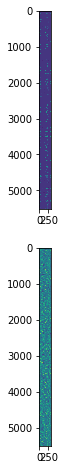

Itr 0, Obj 2984550.723459
Itr 1, Obj 2496252.621190
Itr 2, Obj 2222695.058104
Itr 3, Obj 2041234.690446
Itr 4, Obj 1914098.852971
Itr 5, Obj 1820905.217918
Itr 6, Obj 1749556.129735
Itr 7, Obj 1693018.668846
Itr 8, Obj 1646898.433051
Itr 9, Obj 1608362.838045
Itr 10, Obj 1575525.759520
Itr 11, Obj 1546997.834796
Itr 12, Obj 1521868.954462
Itr 13, Obj 1499466.831686
Itr 14, Obj 1479343.402254
Itr 15, Obj 1461026.657541
Itr 16, Obj 1444308.582487
Itr 17, Obj 1428879.762564
Itr 18, Obj 1414632.671814
Itr 19, Obj 1401374.331632
Itr 20, Obj 1389003.344795
Itr 21, Obj 1377381.778677
Itr 22, Obj 1366419.650893
Itr 23, Obj 1356040.626321
Itr 24, Obj 1346256.613812
Itr 25, Obj 1336969.879102
Itr 26, Obj 1328135.814102
Itr 27, Obj 1319721.609353
Itr 28, Obj 1311700.023197
Itr 29, Obj 1303963.697190
Itr 30, Obj 1296560.889044
Itr 31, Obj 1289502.620797
Itr 32, Obj 1282685.509117
Itr 33, Obj 1276147.982027
Itr 34, Obj 1269854.563294
Itr 35, Obj 1263785.409329
Itr 36, Obj 1257928.733825
Itr 37, Obj

931641.9016801636

In [230]:
yeast_run = NetREX(e_yeast_1, c_yeast_1, lmbda)
yeast_run.NetREX_algorithm()

In [232]:
prednetwork = yeast_run.S

In [235]:
prednetwork.shape

(5508, 323)

In [242]:
net = pd.DataFrame(prednetwork)

In [243]:
net.head()

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,320,321,322
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.281663,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.132317,0.0,0.220207,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.958365,0.0,0.0,0.0,0.303225,0.0,0.248982,0.0,...,0.000000,0.0,0.0,0.487591,0.0,0.512370,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.416582,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.087672,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.702179,0.0,0.0,0.000000,0.0,0.443982,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.155290,0.0,0.0,0.000000,0.0,0.566474,0.0,0.0,0.0,0.0


In [246]:
net2 = net.set_index(trim_zeros_prior.index)

In [247]:
net2.columns = trim_zeros_prior.columns

In [248]:
net2.head()

,MATA1,TBP,YAL011W,YAL021C,YAL043C,YAL051W,YBL002W,YBL005W,YBL008W,YBL021C,...,YPR052C,YPR054W,YPR065W,YPR068C,YPR072W,YPR086W,YPR104C,YPR133C,YPR196W,YPR199C
YAL008W,0.0,0.000000,0.000000,0.0,0.0,0.0,0.281663,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.132317,0.0,0.220207,0.0,0.0,0.0,0.0
YBR255W,0.0,0.000000,0.958365,0.0,0.0,0.0,0.303225,0.0,0.248982,0.0,...,0.000000,0.0,0.0,0.487591,0.0,0.512370,0.0,0.0,0.0,0.0
YGR131W,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.416582,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
YPL144W,0.0,0.087672,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.702179,0.0,0.0,0.000000,0.0,0.443982,0.0,0.0,0.0,0.0
YBR135W,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.155290,0.0,0.0,0.000000,0.0,0.566474,0.0,0.0,0.0,0.0


In [ ]:
#import dill
#dill.dump_session('yeastnetork.db')

In [234]:
#import gold standard networks and add all together

gold1 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/MacIsaac2.KO.txt', header=None, names=['regulator','gene'])
gold2 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/MacIsaac2.NatVar.txt', header=None, names=['regulator','gene'])
gold3 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/MacIsaac2.Stress.txt', header=None, names=['regulator','gene'])
gold4 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/YEASTRACT_Count3.KO.txt', header=None, names=['regulator','gene'])
gold5 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/YEASTRACT_Count3.NatVar.txt', header=None, names=['regulator','gene'])
gold6 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/YEASTRACT_Count3.Stress.txt', header=None, names=['regulator','gene'])                      
gold7 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/YEASTRACT_Type2.KO.txt', header=None, names=['regulator','gene'])                      
gold8 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/YEASTRACT_Type2.NatVar.txt', header=None, names=['regulator','gene'])
gold9 = pd.read_table('../../s2cell-prior/data/yeast_networks/gold/YEASTRACT_Type2.Stress.txt', header=None, names=['regulator','gene'])

goldstd = pd.concat([gold1, gold2, gold3, gold4, gold5, gold6, gold7, gold8, gold9])
goldstd.drop_duplicates(inplace=True)
goldstd.shape
                      

(7921, 2)

In [237]:
goldstd['weight'] = 1.0

In [238]:
goldstd.head()

,regulator,gene,weight
0,YHR206W,YJL116C,1.0
1,YPL248C,YBR020W,1.0
2,YGL162W,YER046W,1.0
3,YOR028C,YKL026C,1.0
4,YGL131C,YAL038W,1.0


In [239]:
goldmatrix = goldstd.set_index(['gene','regulator']).unstack().fillna(value=0)

In [240]:
goldmatrix.shape

(3153, 151)

In [250]:
common = goldmatrix.index.intersection(net2.index)

In [251]:
idx_gold = goldmatrix.loc[common]
idx_predicted = net2.loc[common]

In [252]:
print(idx_gold.shape, idx_predicted.shape)

(3014, 151) (3014, 323)


In [253]:
idx_gold.to_csv('goldstd_idx_for_comparison', sep='\t')
idx_predicted.to_csv('predicted_idx_for_comparison', sep='\t')

100%|██████████| 15.0/15 [00:17<00:00,  1.19s/it]


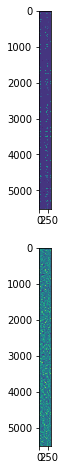

Itr 0, Obj 2983004.476288
Itr 1, Obj 2493841.552250
Itr 2, Obj 2220665.544140
Itr 3, Obj 2039938.494896
Itr 4, Obj 1913252.833395
Itr 5, Obj 1820356.413298
Itr 6, Obj 1749258.888353
Itr 7, Obj 1692819.553970
Itr 8, Obj 1646819.135624
Itr 9, Obj 1608344.243205
Itr 10, Obj 1575552.443290
Itr 11, Obj 1547039.664708
Itr 12, Obj 1521929.604320
Itr 13, Obj 1499547.552131
Itr 14, Obj 1479406.679444
Itr 15, Obj 1461094.914461
Itr 16, Obj 1444365.692158
Itr 17, Obj 1428958.364904
Itr 18, Obj 1414709.406801
Itr 19, Obj 1401430.083366
Itr 20, Obj 1389045.295272
Itr 21, Obj 1377388.640398
Itr 22, Obj 1366443.398545
Itr 23, Obj 1356059.851917
Itr 24, Obj 1346291.236875
Itr 25, Obj 1337022.179194
Itr 26, Obj 1328173.427523
Itr 27, Obj 1319753.809393
Itr 28, Obj 1311694.194721
Itr 29, Obj 1304012.374585
Itr 30, Obj 1296627.735801
Itr 31, Obj 1289539.579689
Itr 32, Obj 1282754.659939
Itr 33, Obj 1276211.815526
Itr 34, Obj 1269897.186424
Itr 35, Obj 1263854.335766
Itr 36, Obj 1258001.169618
Itr 37, Obj

Itr 302, Obj 930762.616099
Itr 303, Obj 930402.821985
Itr 304, Obj 930051.756160
Itr 305, Obj 929691.369072
Itr 306, Obj 929337.414502
Itr 307, Obj 928986.513483
Itr 308, Obj 928630.824780
Itr 309, Obj 928281.209321
Itr 310, Obj 927940.958128
Itr 311, Obj 927588.659584
Itr 312, Obj 927244.553299
Itr 313, Obj 926900.788215
Itr 314, Obj 926545.315105
Itr 315, Obj 926198.434209
Itr 316, Obj 925855.354082
Itr 317, Obj 925523.526819
Itr 318, Obj 925177.208619
Itr 319, Obj 924843.473960
Itr 320, Obj 924511.094328
Itr 321, Obj 924184.628677
Itr 322, Obj 923859.152179
Itr 323, Obj 923522.413281
Itr 324, Obj 923189.264176
Itr 325, Obj 922864.900365
Itr 326, Obj 922543.475099
Itr 327, Obj 922215.292692
Itr 328, Obj 921885.750056
Itr 329, Obj 921568.131793
Itr 330, Obj 921250.529858
Itr 331, Obj 920930.263199
Itr 332, Obj 920605.218760
Itr 333, Obj 920282.210222
Itr 334, Obj 919973.383692
Itr 335, Obj 919642.880436
Itr 336, Obj 919332.961217
Itr 337, Obj 919011.287879
Itr 338, Obj 918691.379547
I

Itr 606, Obj 863556.247178
Itr 607, Obj 863416.876715
Itr 608, Obj 863277.030292
Itr 609, Obj 863142.535818
Itr 610, Obj 862998.512929
Itr 611, Obj 862839.809769
Itr 612, Obj 862698.621162
Itr 613, Obj 862546.638237
Itr 614, Obj 862408.288347
Itr 615, Obj 862275.451404
Itr 616, Obj 862135.630981
Itr 617, Obj 861999.574717
Itr 618, Obj 861867.513023
Itr 619, Obj 861733.044602
Itr 620, Obj 861598.021314
Itr 621, Obj 861472.299075
Itr 622, Obj 861335.574393
Itr 623, Obj 861202.719466
Itr 624, Obj 861064.512110
Itr 625, Obj 860933.664449
Itr 626, Obj 860798.649901
Itr 627, Obj 860661.944760
Itr 628, Obj 860527.919534
Itr 629, Obj 860398.383621
Itr 630, Obj 860273.102675
Itr 631, Obj 860146.662223
Itr 632, Obj 860009.010918
Itr 633, Obj 859873.826226
Itr 634, Obj 859742.600882
Itr 635, Obj 859610.410298
Itr 636, Obj 859488.240812
Itr 637, Obj 859353.306606
Itr 638, Obj 859205.353056
Itr 639, Obj 859071.919000
Itr 640, Obj 858951.836495
Itr 641, Obj 858821.421243
Itr 642, Obj 858681.864426
I

Itr 910, Obj 831856.155699
Itr 911, Obj 831783.670057
Itr 912, Obj 831700.497627
Itr 913, Obj 831619.839997
Itr 914, Obj 831535.321835
Itr 915, Obj 831459.465135
Itr 916, Obj 831381.881887
Itr 917, Obj 831308.222056
Itr 918, Obj 831233.664447
Itr 919, Obj 831155.868425
Itr 920, Obj 831081.212542
Itr 921, Obj 831001.511166
Itr 922, Obj 830931.362275
Itr 923, Obj 830858.365827
Itr 924, Obj 830781.116389
Itr 925, Obj 830709.083642
Itr 926, Obj 830630.054321
Itr 927, Obj 830554.147108
Itr 928, Obj 830467.429233
Itr 929, Obj 830389.659843
Itr 930, Obj 830309.044266
Itr 931, Obj 830235.301609
Itr 932, Obj 830158.999482
Itr 933, Obj 830082.486754
Itr 934, Obj 830009.524680
Itr 935, Obj 829936.025725
Itr 936, Obj 829857.863454
Itr 937, Obj 829782.558982
Itr 938, Obj 829702.388350
Itr 939, Obj 829619.345858
Itr 940, Obj 829547.718270
Itr 941, Obj 829464.596359
Itr 942, Obj 829384.077387
Itr 943, Obj 829309.340517
Itr 944, Obj 829234.894912
Itr 945, Obj 829153.029141
Itr 946, Obj 829073.000035
I

Itr 1206, Obj 812719.232883
Itr 1207, Obj 812669.717927
Itr 1208, Obj 812615.299653
Itr 1209, Obj 812564.476902
Itr 1210, Obj 812513.976326
Itr 1211, Obj 812463.686683
Itr 1212, Obj 812407.797584
Itr 1213, Obj 812347.838867
Itr 1214, Obj 812301.920767
Itr 1215, Obj 812248.738108
Itr 1216, Obj 812189.875842
Itr 1217, Obj 812139.843763
Itr 1218, Obj 812086.124283
Itr 1219, Obj 812035.191656
Itr 1220, Obj 811985.630541
Itr 1221, Obj 811933.945647
Itr 1222, Obj 811886.386605
Itr 1223, Obj 811832.652956
Itr 1224, Obj 811778.449510
Itr 1225, Obj 811716.686168
Itr 1226, Obj 811665.232322
Itr 1227, Obj 811610.682674
Itr 1228, Obj 811562.187527
Itr 1229, Obj 811509.642684
Itr 1230, Obj 811450.062098
Itr 1231, Obj 811399.822433
Itr 1232, Obj 811351.447935
Itr 1233, Obj 811301.456094
Itr 1234, Obj 811249.286921
Itr 1235, Obj 811199.190999
Itr 1236, Obj 811150.003342
Itr 1237, Obj 811093.700806
Itr 1238, Obj 811046.908303
Itr 1239, Obj 811000.025117
Itr 1240, Obj 810946.202673
Itr 1241, Obj 810896

Itr 1499, Obj 799334.336108
Itr 1500, Obj 799289.743995
Itr 1501, Obj 799249.388983
Itr 1502, Obj 799211.147339
Itr 1503, Obj 799171.807988
Itr 1504, Obj 799128.356122
Itr 1505, Obj 799089.383000
Itr 1506, Obj 799050.234455
Itr 1507, Obj 799012.801264
Itr 1508, Obj 798973.679946
Itr 1509, Obj 798930.591123
Itr 1510, Obj 798893.300886
Itr 1511, Obj 798858.305775
Itr 1512, Obj 798821.308447
Itr 1513, Obj 798788.441746
Itr 1514, Obj 798754.346921
Itr 1515, Obj 798721.395599
Itr 1516, Obj 798687.832982
Itr 1517, Obj 798647.250472
Itr 1518, Obj 798601.640349
Itr 1519, Obj 798559.345786
Itr 1520, Obj 798521.592798
Itr 1521, Obj 798483.216712
Itr 1522, Obj 798443.797651
Itr 1523, Obj 798404.751764
Itr 1524, Obj 798363.687618
Itr 1525, Obj 798327.782685
Itr 1526, Obj 798291.718455
Itr 1527, Obj 798245.889113
Itr 1528, Obj 798208.139780
Itr 1529, Obj 798168.900122
Itr 1530, Obj 798129.573730
Itr 1531, Obj 798097.103712
Itr 1532, Obj 798053.769193
Itr 1533, Obj 798010.483110
Itr 1534, Obj 797971

Itr 1792, Obj 789198.067181
Itr 1793, Obj 789166.429584
Itr 1794, Obj 789133.623259
Itr 1795, Obj 789108.121239
Itr 1796, Obj 789077.563503
Itr 1797, Obj 789046.658117
Itr 1798, Obj 789008.837570
Itr 1799, Obj 788977.135285
Itr 1800, Obj 788941.217996
Itr 1801, Obj 788912.382960
Itr 1802, Obj 788883.609424
Itr 1803, Obj 788850.978529
Itr 1804, Obj 788816.182750
Itr 1805, Obj 788782.635357
Itr 1806, Obj 788742.029838
Itr 1807, Obj 788709.460272
Itr 1808, Obj 788678.798158
Itr 1809, Obj 788650.109939
Itr 1810, Obj 788616.878800
Itr 1811, Obj 788578.170101
Itr 1812, Obj 788552.681429
Itr 1813, Obj 788523.912231
Itr 1814, Obj 788495.357161
Itr 1815, Obj 788463.912956
Itr 1816, Obj 788435.491898
Itr 1817, Obj 788407.059274
Itr 1818, Obj 788379.544568
Itr 1819, Obj 788356.150915
Itr 1820, Obj 788327.852310
Itr 1821, Obj 788293.896306
Itr 1822, Obj 788258.451431
Itr 1823, Obj 788231.906092
Itr 1824, Obj 788198.570107
Itr 1825, Obj 788172.382383
Itr 1826, Obj 788144.939486
Itr 1827, Obj 788110

783310.2993147693

In [255]:
#Run again with 2000 iterations possible 

yeast_run_2 = NetREX(e_yeast_1, c_yeast_1, lmbda)
yeast_run_2.NetREX_algorithm()

In [259]:
newpredicted = pd.DataFrame(yeast_run_2.S)

newpredicted = newpredicted.set_index(trim_zeros_prior.index)
newpredicted.columns = trim_zeros_prior.columns

In [261]:
newpredicted.to_csv('predicted2', sep='\t')